Year Range for the Dataset

The project predicting inflation/deflation rates and recession risk, the dataset should ideally cover at least 30 year of economic data. 

1. Economic Cycles: Recessions and inflationary/deflationary trends occur in cycles (e.g., every 8-12 years). A long historical dataset ensures that your model captures multiple economic cycles, including major events like:
   - The 2008 Financial Crisis.
   - The COVID-19 Economic Disruption (2020-2022).
   - The 1997 Asian Financial Crisis.

2. Robust Predictions: Models trained on a larger historical dataset are better at generalizing and identifying patterns for future predictions.

3. News Data: If you include news data, aim for at least 10-15 years (2008-2024). News sentiment trends combined with economic indicators over major recession years will help train your model better.


Recommended Year Range 
1990 - 2024(34 years):  
- Covers key economic disruptions and recoveries.  
- Allows feature engineering to include lag data (e.g., rolling averages).


Inflation Data (CPI/PPI)	

- World Bank Open Data
- IMF Economic Outlook
- FRED API (Federal Reserve)
- OECD Data

GDP Growth Rates	

- World Bank Open Data
- IMF Data & Reports

Unemployment Rates	
- U.S. Bureau of Labor Statistics (BLS)
- Eurostat (Europe)
- Trading Economics

Interest Rates	
- FRED API
- Central Bank websites (e.g., Federal Reserve, RBI)
- Investing.com

Bond Yields & Yield Spread	
- U.S. Treasury Data (FRED API)
- Investing.com

Exchange Rates	
- Yahoo Finance
- Alpha Vantage API

Other Improtant Datas:

Use BeautifulSoup, or Scrapy to scrape financial news headlines and content.
- Financial Times
- Bloomberg
- Reuters
- CNBC

Sentiment Analysis Dataset:
- Kaggle: Ready-to-use datasets with labeled sentiment scores for financial news.

Additional Datasets for Macro-Economic Indicators
- Kaggle: Search for datasets related to recession indicators, CPI, GDP, unemployment rates, etc.
- World Bank: Download global macroeconomic datasets.
- OECD: Provides organized economic indicators for various countries.


Data Integration
- Combine Sources: Align data based on monthly/quarterly timelines.
- Feature Engineering: Add derived features like lag values, moving averages, and news sentiment scores.

In [1]:
import pandas as pd

# Specify the path to your CSV file
file_path = r'C:\Users\Ajay\Downloads\economic_indicator_usa.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
print(df)



FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Ajay\\Downloads\\economic_indicator_usa.csv'

In [2]:
df

,Country Name,Country Code,Series Name,Series Code,2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,United States,USA,Consumer price index (2010 = 100),FP.CPI.TOTL,86.621678,89.560532,92.449705,95.086992,98.737477,98.38642,...,108.566932,108.695722,110.067009,112.411557,115.157303,117.244195,118.690502,124.266414,134.211206,139.735794
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Last Updated: 12/16/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:


# Step 1: Clean column names to remove leading/trailing spaces
df.columns = df.columns.str.strip()

# Step 2: Drop all rows with NaN in important columns
df = df.dropna(subset=['Country Code', 'Series Name'])

# Step 3: Remove unnecessary columns
df = df.drop(columns=['Country Name', 'Country Code', 'Series Code'])

# Step 4: Melt the DataFrame to transform it into long format
df_long = df.melt(
    id_vars=['Series Name'],  # Keep the series name constant
    var_name='Year',          # New column for years
    value_name='CPI Value'    # New column for CPI values
)

# Step 5: Extract the 4-digit year (including spaces and text like '[YR2014]')
df_long['Year'] = df_long['Year'].str.extract('(\d{4})')

# Step 6: Drop rows with missing CPI values or years
df_long = df_long.dropna(subset=['CPI Value', 'Year'])

# Step 7: Convert Year column to integer type
df_long['Year'] = df_long['Year'].astype(int)

# Step 8: Final clean DataFrame
df_final = df_long.reset_index(drop=True)

# Display the transformed data
print(df_final.head())

# Save the transformed DataFrame
df_final.to_csv("transformed_cpi_data.csv", index=False)


                         Series Name  Year  CPI Value
0  Consumer price index (2010 = 100)  2004  86.621678
1  Consumer price index (2010 = 100)  2005  89.560532
2  Consumer price index (2010 = 100)  2006  92.449705
3  Consumer price index (2010 = 100)  2007  95.086992
4  Consumer price index (2010 = 100)  2008  98.737477


In [4]:
df_final.head(20)

,Series Name,Year,CPI Value
0,Consumer price index (2010 = 100),2004,86.621678
1,Consumer price index (2010 = 100),2005,89.560532
2,Consumer price index (2010 = 100),2006,92.449705
3,Consumer price index (2010 = 100),2007,95.086992
4,Consumer price index (2010 = 100),2008,98.737477
5,Consumer price index (2010 = 100),2009,98.386420
6,Consumer price index (2010 = 100),2010,100.000000
7,Consumer price index (2010 = 100),2011,103.156842
8,Consumer price index (2010 = 100),2012,105.291505
9,Consumer price index (2010 = 100),2013,106.833849


In [47]:
import pandas as pd

# Specify the path to your CSV file
file_path = r'C:\Users\Ajay\Desktop\data_science__bootcamp__cev\gdp_data.csv'

# Read the CSV file into a DataFrame
df_gdp = pd.read_csv(file_path)

# Display the DataFrame
print(df_gdp)



    observation_date        GDP
0         1947-01-01    243.164
1         1947-04-01    245.968
2         1947-07-01    249.585
3         1947-10-01    259.745
4         1948-01-01    265.742
..               ...        ...
306       2023-07-01  27967.697
307       2023-10-01  28296.967
308       2024-01-01  28624.069
309       2024-04-01  29016.714
310       2024-07-01  29374.914

[311 rows x 2 columns]


In [48]:
df_gdp

,observation_date,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742
...,...,...
306,2023-07-01,27967.697
307,2023-10-01,28296.967
308,2024-01-01,28624.069
309,2024-04-01,29016.714


In [49]:
df_gdp.to_csv("gdp_data.csv", index=False)

In [41]:
import pandas as pd

# Specify the path to your CSV file
file_path = r'C:\Users\Ajay\Desktop\data_science__bootcamp__cev\cpi_data.csv'

# Read the CSV file into a DataFrame
df_cpi = pd.read_csv(file_path)

# Display the DataFrame
print(df_cpi)



    observation_date  CPIAUCSL
0         1947-01-01    21.480
1         1947-02-01    21.620
2         1947-03-01    22.000
3         1947-04-01    22.000
4         1947-05-01    21.950
..               ...       ...
930       2024-07-01   313.534
931       2024-08-01   314.121
932       2024-09-01   314.686
933       2024-10-01   315.454
934       2024-11-01   316.441

[935 rows x 2 columns]


In [42]:
df_cpi

,observation_date,CPIAUCSL
0,1947-01-01,21.480
1,1947-02-01,21.620
2,1947-03-01,22.000
3,1947-04-01,22.000
4,1947-05-01,21.950
...,...,...
930,2024-07-01,313.534
931,2024-08-01,314.121
932,2024-09-01,314.686
933,2024-10-01,315.454


In [43]:
df_cpi.to_csv("cpi_data.csv", index= False)

In [44]:
import pandas as pd

# Specify the path to your CSV file
file_path = r'C:\Users\Ajay\Desktop\data_science__bootcamp__cev\unemployment_rate.csv'

# Read the CSV file into a DataFrame
df_un_emp = pd.read_csv(file_path)

# Display the DataFrame
print(df_un_emp)



    observation_date  UNRATE
0         1948-01-01     3.4
1         1948-02-01     3.8
2         1948-03-01     4.0
3         1948-04-01     3.9
4         1948-05-01     3.5
..               ...     ...
918       2024-07-01     4.3
919       2024-08-01     4.2
920       2024-09-01     4.1
921       2024-10-01     4.1
922       2024-11-01     4.2

[923 rows x 2 columns]


In [45]:
df_un_emp

,observation_date,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
918,2024-07-01,4.3
919,2024-08-01,4.2
920,2024-09-01,4.1
921,2024-10-01,4.1


In [46]:
df_un_emp.to_csv("unemployment_rate.csv", index=False)

In [39]:
import pandas as pd

# Specify the path to your CSV file
file_path = r'C:\Users\Ajay\Desktop\data_science__bootcamp__cev\DFF.csv'

# Read the CSV file into a DataFrame
df_int_rate = pd.read_csv(file_path)

# Display the DataFrame
print(df_int_rate)



      observation_date   DFF
0           1954-07-01  1.13
1           1954-07-02  1.25
2           1954-07-03  1.25
3           1954-07-04  1.25
4           1954-07-05  0.88
...                ...   ...
25733       2024-12-13  4.58
25734       2024-12-14  4.58
25735       2024-12-15  4.58
25736       2024-12-16  4.58
25737       2024-12-17  4.58

[25738 rows x 2 columns]


In [40]:
df_int_rate

,observation_date,DFF
0,1954-07-01,1.13
1,1954-07-02,1.25
2,1954-07-03,1.25
3,1954-07-04,1.25
4,1954-07-05,0.88
...,...,...
25733,2024-12-13,4.58
25734,2024-12-14,4.58
25735,2024-12-15,4.58
25736,2024-12-16,4.58


In [1]:
import pandas as pd

# Specify the path to your CSV file
file_path = r'C:\Users\Ajay\Desktop\data_science__bootcamp__cev\AAA_bond_yield.csv'

# Read the CSV file into a DataFrame
df_aaa_bond = pd.read_csv(file_path)

# Display the DataFrame
print(df_aaa_bond)



      observation_date   DAAA
0           1983-01-03  11.77
1           1983-01-04  11.79
2           1983-01-05  11.79
3           1983-01-06  11.74
4           1983-01-07  11.74
...                ...    ...
10943       2024-12-12   5.16
10944       2024-12-13   5.23
10945       2024-12-16   5.21
10946       2024-12-17   5.19
10947       2024-12-18   5.26

[10948 rows x 2 columns]


In [2]:
df_aaa_bond

,observation_date,DAAA
0,1983-01-03,11.77
1,1983-01-04,11.79
2,1983-01-05,11.79
3,1983-01-06,11.74
4,1983-01-07,11.74
...,...,...
10943,2024-12-12,5.16
10944,2024-12-13,5.23
10945,2024-12-16,5.21
10946,2024-12-17,5.19


In [5]:
i = 1
j = 25
d = j - i
for j < 10924:
    df_aaa_bond.drop(index = range(i,j))
    i = j + 1
    j = j + d
df_aaa_bond


,observation_date,DAAA
0,1983-01-03,11.77
25,1983-02-07,12.11
26,1983-02-08,12.10
27,1983-02-09,12.14
28,1983-02-10,12.10
...,...,...
10943,2024-12-12,5.16
10944,2024-12-13,5.23
10945,2024-12-16,5.21
10946,2024-12-17,5.19


In [58]:
import pandas as pd

# Specify the path to your CSV file
file_path = r'C:\Users\Ajay\Desktop\data_science__bootcamp__cev\DGS3MO (Three months treasury yield).csv'

# Read the CSV file into a DataFrame
df_3_mo_treasury_bill = pd.read_csv(file_path)

# Display the DataFrame
print(df_3_mo_treasury_bill)



      observation_date  DGS3MO
0           1981-09-01   17.01
1           1981-09-02   16.65
2           1981-09-03   16.96
3           1981-09-04   16.64
4           1981-09-07     NaN
...                ...     ...
11292       2024-12-12    4.35
11293       2024-12-13    4.34
11294       2024-12-16    4.37
11295       2024-12-17    4.38
11296       2024-12-18    4.36

[11297 rows x 2 columns]


In [59]:
import pandas as pd

# Specify the path to your CSV file
file_path = r'C:\Users\Ajay\Desktop\data_science__bootcamp__cev\DGS2 (two year treasury bill).csv'

# Read the CSV file into a DataFrame
df_2yr_treasury_bill = pd.read_csv(file_path)

# Display the DataFrame
print(df_2yr_treasury_bill)



      observation_date  DGS2
0           1976-06-01  7.26
1           1976-06-02  7.23
2           1976-06-03  7.22
3           1976-06-04  7.12
4           1976-06-07  7.09
...                ...   ...
12662       2024-12-12  4.18
12663       2024-12-13  4.25
12664       2024-12-16  4.25
12665       2024-12-17  4.25
12666       2024-12-18  4.35

[12667 rows x 2 columns]


In [63]:
import pandas as pd

# Specify the path to your CSV file
file_path = r'C:\Users\Ajay\Desktop\data_science__bootcamp__cev\DGS10 (10 year treasury bill).csv'

# Read the CSV file into a DataFrame
df_10yr_treasury_bill = pd.read_csv(file_path)

# Display the DataFrame
print(df_10yr_treasury_bill)



      observation_date  DGS10
0           1962-01-02   4.06
1           1962-01-03   4.03
2           1962-01-04   3.99
3           1962-01-05   4.02
4           1962-01-08   4.03
...                ...    ...
16422       2024-12-12   4.32
16423       2024-12-13   4.40
16424       2024-12-16   4.39
16425       2024-12-17   4.40
16426       2024-12-18   4.50

[16427 rows x 2 columns]


In [67]:
import pandas as pd

# Specify the path to your CSV file
file_path = r'C:\Users\Ajay\Desktop\data_science__bootcamp__cev\DGS30 (30 yr yield).csv'

# Read the CSV file into a DataFrame
df_30yr_bond = pd.read_csv(file_path)

# Display the DataFrame
print(df_30yr_bond)



      observation_date  DGS30
0           1977-02-15   7.70
1           1977-02-16   7.67
2           1977-02-17   7.67
3           1977-02-18   7.76
4           1977-02-21    NaN
...                ...    ...
12477       2024-12-12   4.55
12478       2024-12-13   4.61
12479       2024-12-16   4.60
12480       2024-12-17   4.59
12481       2024-12-18   4.65

[12482 rows x 2 columns]


In [64]:
import pandas as pd

# Specify the path to your CSV file
file_path = r'C:\Users\Ajay\Desktop\data_science__bootcamp__cev\BAA_bond_yield.csv'

# Read the CSV file into a DataFrame
df_baa_bond = pd.read_csv(file_path)

# Display the DataFrame
print(df_baa_bond)



      observation_date   DBAA
0           1986-01-02  11.38
1           1986-01-03  11.35
2           1986-01-06  11.36
3           1986-01-07  11.29
4           1986-01-08  11.34
...                ...    ...
10160       2024-12-12   5.76
10161       2024-12-13   5.82
10162       2024-12-16   5.81
10163       2024-12-17   5.79
10164       2024-12-18   5.87

[10165 rows x 2 columns]


In [66]:
import pandas as pd

# Specify the path to your CSV file
file_path = r'C:\Users\Ajay\Desktop\data_science__bootcamp__cev\yield_spread.csv'

# Read the CSV file into a DataFrame
df_yield_spread = pd.read_csv(file_path)

# Display the DataFrame
print(df_yield_spread)



     observation_date  BAMLH0A0HYM2
0          1996-12-31          3.13
1          1997-01-01           NaN
2          1997-01-02          3.06
3          1997-01-03          3.09
4          1997-01-06          3.10
...               ...           ...
7387       2024-12-12          2.66
7388       2024-12-13          2.68
7389       2024-12-16          2.69
7390       2024-12-17          2.75
7391       2024-12-18          2.73

[7392 rows x 2 columns]


In [68]:
import yfinance as yf
import pandas as pd

# Define the currency pairs (USD to other currencies)
currency_pairs = {
    "USD_INR": "USDINR=X",  # USD to Indian Rupee
    "USD_RUB": "USDRUB=X",  # USD to Russian Ruble
    "USD_EUR": "USDEUR=X"   # USD to Euro
}

# Download historical data for each currency pair (daily data, for example)
start_date = '1980-01-01'  # Example start date
end_date = '2024-01-01'    # Example end date

# Create a dictionary to store the dataframes
exchange_rate_data = {}

for label, pair in currency_pairs.items():
    # Fetch the historical data from Yahoo Finance
    data = yf.download(pair, start=start_date, end=end_date)
    
    # Store the data in the dictionary
    exchange_rate_data[label] = data

# Now, we can access the dataframes like:
usd_inr_df = exchange_rate_data["USD_INR"]
usd_rub_df = exchange_rate_data["USD_RUB"]
usd_eur_df = exchange_rate_data["USD_EUR"]

# Print the dataframes to verify
print("USD to INR Data:")
print(usd_inr_df.head())

print("\nUSD to RUB Data:")
print(usd_rub_df.head())

print("\nUSD to EUR Data:")
print(usd_eur_df.head())

# Optionally, you can save the dataframes to CSVs
usd_inr_df.to_csv('exchange_rate_USD_RUP.csv')
usd_rub_df.to_csv('exchange_rate_USD_RUB.csv')
usd_eur_df.to_csv('exchange_rate_USD_EUR.csv')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
USD to INR Data:
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2003-12-01  45.709000  45.728001  45.615002  45.709999  45.709999       0
2003-12-02  45.709000  45.719002  45.560001  45.629002  45.629002       0
2003-12-03  45.632000  45.655998  45.474998  45.549999  45.549999       0
2003-12-04  45.548000  45.612999  45.519001  45.548000  45.548000       0
2003-12-05  45.549999  45.566002  45.449001  45.449001  45.449001       0

USD to RUB Data:
                 Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2003-12-01  29.730000  29.730000  29.690001  29.700001  29.700001       0
2003-12-02  29.690

In [70]:
usd_eur_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-01,0.83098,0.83724,0.83056,0.83577,0.83577,0
2003-12-02,0.83605,0.83710,0.82583,0.82720,0.82720,0
2003-12-03,0.82713,0.82802,0.82440,0.82488,0.82488,0
2003-12-04,0.82508,0.83029,0.82345,0.82775,0.82775,0
2003-12-05,0.82795,0.82878,0.82028,0.82055,0.82055,0
...,...,...,...,...,...,...
2023-12-25,0.90690,0.90910,0.90560,0.90690,0.90690,0
2023-12-26,0.90742,0.90830,0.90580,0.90742,0.90742,0
2023-12-27,0.90555,0.90668,0.89908,0.90555,0.90555,0


In [71]:
import pandas as pd

# Specify the path to your CSV file
file_path = r'C:\Users\Ajay\Desktop\data_science__bootcamp__cev\reuters_headlines.csv'

# Read the CSV file into a DataFrame
df_news = pd.read_csv(file_path)

# Display the DataFrame
print(df_news)



                                               Headlines         Time  \
0      TikTok considers London and other locations fo...  Jul 18 2020   
1      Disney cuts ad spending on Facebook amid growi...  Jul 18 2020   
2      Trail of missing Wirecard executive leads to B...  Jul 18 2020   
3      Twitter says attackers downloaded data from up...  Jul 18 2020   
4      U.S. Republicans seek liability protections as...  Jul 17 2020   
...                                                  ...          ...   
32765  Malaysia says never hired British data firm at...  Mar 20 2018   
32766  Prosecutors search Volkswagen headquarters in ...  Mar 20 2018   
32767   McDonald's sets greenhouse gas reduction targets  Mar 20 2018   
32768  Pratt & Whitney to deliver spare A320neo engin...  Mar 20 2018   
32769  UK will always consider ways to improve data l...  Mar 20 2018   

                                             Description  
0      TikTok has been in discussions with the UK gov...  
1    

In [72]:
df_news

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...
...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...


In [16]:
import pandas as pd 
df_concat = pd.read_csv(r"C:\Users\Ajay\Desktop\data_science__bootcamp__cev\us_market_data_daily.csv")

In [17]:
df_concat

,observation_date,GDP,CPI,unemployment,DGS30_x,Yield Spread,IND US,US UK,US RUSSIA,Interest Rate,DAAA,DBAA,DFF,Sentiment,DGS30_y,DGS10,DGS3MO,DGS2
0,1990-01-01,5872.701,127.500000,5.400000,8.260000,0.120000,16.963300,1.651200,0.1380,9.900000,8.990000,9.940000,8.230000,93.000000,8.260000,8.210000,7.900000,8.090000
1,1990-01-02,5873.640,127.516129,5.396774,8.267742,0.119355,16.964145,1.652648,0.1380,9.909677,8.997419,9.946452,8.230323,92.887097,8.267742,8.218387,7.903226,8.099032
2,1990-01-03,5874.579,127.532258,5.393548,8.275484,0.118710,16.964990,1.654097,0.1380,9.919355,9.004839,9.952903,8.230645,92.774194,8.275484,8.226774,7.906452,8.108065
3,1990-01-04,5875.518,127.548387,5.390323,8.283226,0.118065,16.965835,1.655545,0.1380,9.929032,9.012258,9.959355,8.230968,92.661290,8.283226,8.235161,7.909677,8.117097
4,1990-01-05,5876.457,127.564516,5.387097,8.290968,0.117419,16.966681,1.656994,0.1380,9.938710,9.019677,9.965806,8.231290,92.548387,8.290968,8.243548,7.912903,8.126129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12780,2024-12-28,29374.914,316.441000,4.200000,4.540000,0.130000,84.332600,1.273800,88.0459,6.720000,5.190000,5.790000,4.480000,71.800000,4.580000,4.390000,4.390000,4.230000
12781,2024-12-29,29374.914,316.441000,4.200000,4.540000,0.130000,84.332600,1.273800,88.0459,6.720000,5.190000,5.790000,4.480000,71.800000,4.580000,4.390000,4.390000,4.230000
12782,2024-12-30,29374.914,316.441000,4.200000,4.540000,0.130000,84.332600,1.273800,88.0459,6.720000,5.190000,5.790000,4.480000,71.800000,4.580000,4.390000,4.390000,4.230000
12783,2024-12-31,29374.914,316.441000,4.200000,4.540000,0.130000,84.332600,1.273800,88.0459,6.720000,5.190000,5.790000,4.480000,71.800000,4.580000,4.390000,4.390000,4.230000


In [37]:
import pandas as pd

# Load the CSV data into a DataFrame
df_inflation = pd.read_csv(r"C:\Users\Ajay\Desktop\data_science__bootcamp__cev\Inflation_rate.csv")

# Convert the observation_date column to datetime
df_inflation['observation_date'] = pd.to_datetime(df_inflation['observation_date'])

# Set the observation_date as the index
df_inflation.set_index('observation_date', inplace=True)

# Create a date range from the start of the data to 2025-01-01
date_range = pd.date_range(start=df_inflation.index.min(), end='2025-01-01', freq='D')

# Reindex the DataFrame to this new date range
df_inflation = df_inflation.reindex(date_range)

# Resample the data to daily frequency and interpolate the missing values
df_daily_inflation = df_inflation.interpolate()

# Reset the index and rename the index column to 'observation_date'
df_daily_inflation.reset_index(inplace=True)
df_daily_inflation.rename(columns={'index': 'observation_date'}, inplace=True)

# Print the interpolated data for verification
print(df_daily_inflation)

      observation_date  FPCPITOTLZGUSA
0           1990-01-01        5.397956
1           1990-01-02        5.394770
2           1990-01-03        5.391584
3           1990-01-04        5.388398
4           1990-01-05        5.385211
...                ...             ...
12780       2024-12-28        4.116338
12781       2024-12-29        4.116338
12782       2024-12-30        4.116338
12783       2024-12-31        4.116338
12784       2025-01-01        4.116338

[12785 rows x 2 columns]


In [38]:
df_daily_inflation.to_csv('inflation_rate_daily.csv', index=False)

In [2]:
import pandas as pd

# Load the existing concatenated dataset
df_concat = pd.read_csv(r"C:\Users\Ajay\Desktop\data_science__bootcamp__cev\us_market_data_daily.csv")

# Load the daily inflation data
df_daily_inflation = pd.read_csv(r"C:\Users\Ajay\Desktop\data_science__bootcamp__cev\inflation_rate_daily.csv")

# Check if df_daily_inflation is loaded correctly
if df_daily_inflation.empty:
    raise ValueError("The df_daily_inflation DataFrame is empty. Please check the CSV file.")

# Ensure the column names are correct
if 'observation_date' not in df_daily_inflation.columns:
    if len(df_daily_inflation.columns) > 0:
        df_daily_inflation.rename(columns={df_daily_inflation.columns[0]: 'observation_date'}, inplace=True)
    else:
        raise ValueError("The df_daily_inflation DataFrame does not have any columns. Please check the CSV file.")

# Convert the observation_date column to datetime in both dataframes
df_concat['observation_date'] = pd.to_datetime(df_concat['observation_date'], errors='coerce')
df_daily_inflation['observation_date'] = pd.to_datetime(df_daily_inflation['observation_date'], errors='coerce')

# Drop rows with invalid dates
df_concat.dropna(subset=['observation_date'], inplace=True)
df_daily_inflation.dropna(subset=['observation_date'], inplace=True)

# Merge the two DataFrames on 'observation_date'
df_concat = df_concat.merge(df_daily_inflation, on='observation_date', how='left')

# Rename the inflation column for clarity
df_concat.rename(columns={'FPCPITOTLZGUSA': 'inflation_rate'}, inplace=True)

# Verify the result
print(df_concat.head())

# Save the updated dataframe
df_concat.to_csv(r"C:\Users\Ajay\Desktop\data_science__bootcamp__cev\us_market_data_daily_with_inflation.csv", index=False)


  observation_date       GDP         CPI  unemployment   DGS30_x  \
0       1990-01-01  5872.701  127.500000      5.400000  8.260000   
1       1990-01-02  5873.640  127.516129      5.396774  8.267742   
2       1990-01-03  5874.579  127.532258      5.393548  8.275484   
3       1990-01-04  5875.518  127.548387      5.390323  8.283226   
4       1990-01-05  5876.457  127.564516      5.387097  8.290968   

   Yield Spread     IND US     US UK  US RUSSIA  Interest Rate      DAAA  \
0      0.120000  16.963300  1.651200      0.138       9.900000  8.990000   
1      0.119355  16.964145  1.652648      0.138       9.909677  8.997419   
2      0.118710  16.964990  1.654097      0.138       9.919355  9.004839   
3      0.118065  16.965835  1.655545      0.138       9.929032  9.012258   
4      0.117419  16.966681  1.656994      0.138       9.938710  9.019677   

       DBAA       DFF  Sentiment   DGS30_y     DGS10    DGS3MO      DGS2  \
0  9.940000  8.230000  93.000000  8.260000  8.210000  7.90

In [3]:
df_concat

,observation_date,GDP,CPI,unemployment,DGS30_x,Yield Spread,IND US,US UK,US RUSSIA,Interest Rate,DAAA,DBAA,DFF,Sentiment,DGS30_y,DGS10,DGS3MO,DGS2,inflation_rate
0,1990-01-01,5872.701,127.500000,5.400000,8.260000,0.120000,16.963300,1.651200,0.1380,9.900000,8.990000,9.940000,8.230000,93.000000,8.260000,8.210000,7.900000,8.090000,5.397956
1,1990-01-02,5873.640,127.516129,5.396774,8.267742,0.119355,16.964145,1.652648,0.1380,9.909677,8.997419,9.946452,8.230323,92.887097,8.267742,8.218387,7.903226,8.099032,5.394770
2,1990-01-03,5874.579,127.532258,5.393548,8.275484,0.118710,16.964990,1.654097,0.1380,9.919355,9.004839,9.952903,8.230645,92.774194,8.275484,8.226774,7.906452,8.108065,5.391584
3,1990-01-04,5875.518,127.548387,5.390323,8.283226,0.118065,16.965835,1.655545,0.1380,9.929032,9.012258,9.959355,8.230968,92.661290,8.283226,8.235161,7.909677,8.117097,5.388398
4,1990-01-05,5876.457,127.564516,5.387097,8.290968,0.117419,16.966681,1.656994,0.1380,9.938710,9.019677,9.965806,8.231290,92.548387,8.290968,8.243548,7.912903,8.126129,5.385211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12780,2024-12-28,29374.914,316.441000,4.200000,4.540000,0.130000,84.332600,1.273800,88.0459,6.720000,5.190000,5.790000,4.480000,71.800000,4.580000,4.390000,4.390000,4.230000,4.116338
12781,2024-12-29,29374.914,316.441000,4.200000,4.540000,0.130000,84.332600,1.273800,88.0459,6.720000,5.190000,5.790000,4.480000,71.800000,4.580000,4.390000,4.390000,4.230000,4.116338
12782,2024-12-30,29374.914,316.441000,4.200000,4.540000,0.130000,84.332600,1.273800,88.0459,6.720000,5.190000,5.790000,4.480000,71.800000,4.580000,4.390000,4.390000,4.230000,4.116338
12783,2024-12-31,29374.914,316.441000,4.200000,4.540000,0.130000,84.332600,1.273800,88.0459,6.720000,5.190000,5.790000,4.480000,71.800000,4.580000,4.390000,4.390000,4.230000,4.116338


In [34]:
import numpy as np
import pandas as pd

# Ensure observation_date is in datetime format
df_concat['observation_date'] = pd.to_datetime(df_concat['observation_date'], errors='coerce')

# Drop rows with invalid observation_date
df_concat.dropna(subset=['observation_date'], inplace=True)

# Create a new hourly date range
hourly_index = pd.date_range(
    start=df_concat['observation_date'].min(), 
    end=df_concat['observation_date'].max(), 
    freq='H'
)

# Create a new DataFrame with the hourly index
df_hourly = pd.DataFrame({'observation_date': hourly_index})

# Merge the hourly DataFrame with the original daily DataFrame
df_hourly = pd.merge_asof(
    df_hourly.sort_values('observation_date'), 
    df_concat.sort_values('observation_date'), 
    on='observation_date'
)

# Function for Fourier Interpolation
def fourier_interpolation(series, n_harmonics=5):
    # Perform Fourier Transform to get the frequency components
    freq_components = np.fft.fft(series)
    
    # Set components that are too high to zero (reduces noise)
    freq_components[n_harmonics:] = 0
    
    # Inverse Fourier Transform to get the reconstructed series
    return np.fft.ifft(freq_components).real

# Apply Fourier Interpolation to numeric columns
numeric_columns = df_hourly.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    df_hourly[col] = fourier_interpolation(df_hourly[col])

# Save the interpolated DataFrame to a new CSV file
df_hourly.to_csv(r"C:\Users\Ajay\Desktop\data_science__bootcamp__cev\us_market_data_hourly_with_inflation_modified.csv", index=False)

# Verify the result
print(df_hourly.head(24))  # Display the first 24 hours


      observation_date           GDP         CPI  unemployment   DGS30_x  \
0  1990-01-01 00:00:00  16132.094663  215.260700      5.241472  5.531168   
1  1990-01-01 01:00:00  16131.796186  215.258396      5.241510  5.531238   
2  1990-01-01 02:00:00  16131.497706  215.256092      5.241548  5.531309   
3  1990-01-01 03:00:00  16131.199223  215.253787      5.241586  5.531379   
4  1990-01-01 04:00:00  16130.900736  215.251483      5.241624  5.531449   
5  1990-01-01 05:00:00  16130.602246  215.249179      5.241663  5.531519   
6  1990-01-01 06:00:00  16130.303753  215.246875      5.241701  5.531589   
7  1990-01-01 07:00:00  16130.005258  215.244571      5.241739  5.531660   
8  1990-01-01 08:00:00  16129.706758  215.242267      5.241777  5.531730   
9  1990-01-01 09:00:00  16129.408256  215.239963      5.241815  5.531800   
10 1990-01-01 10:00:00  16129.109751  215.237658      5.241853  5.531870   
11 1990-01-01 11:00:00  16128.811242  215.235354      5.241891  5.531940   
12 1990-01-0

In [32]:
df_hourly.head(48)

,observation_date,GDP,CPI,unemployment,DGS30_x,Yield Spread,IND US,US UK,US RUSSIA,Interest Rate,DAAA,DBAA,DFF,Sentiment,DGS30_y,DGS10,DGS3MO,DGS2,inflation_rate
0,1990-01-01 00:00:00,16132.094663,215.260700,5.241472,5.531168,0.659944,51.525940,1.556631,39.111076,7.149201,6.330531,7.278809,4.333904,78.232921,5.531880,5.207840,4.258079,4.547690,3.639756
1,1990-01-01 01:00:00,16131.796186,215.258396,5.241510,5.531238,0.659974,51.525153,1.556635,39.110012,7.149256,6.330602,7.278882,4.333925,78.233079,5.531951,5.207907,4.258096,4.547727,3.639720
2,1990-01-01 02:00:00,16131.497706,215.256092,5.241548,5.531309,0.660005,51.524366,1.556639,39.108947,7.149311,6.330674,7.278956,4.333946,78.233236,5.532021,5.207974,4.258113,4.547763,3.639683
3,1990-01-01 03:00:00,16131.199223,215.253787,5.241586,5.531379,0.660035,51.523579,1.556644,39.107882,7.149366,6.330745,7.279030,4.333966,78.233393,5.532091,5.208040,4.258131,4.547799,3.639646
4,1990-01-01 04:00:00,16130.900736,215.251483,5.241624,5.531449,0.660066,51.522792,1.556648,39.106818,7.149421,6.330816,7.279103,4.333987,78.233550,5.532161,5.208107,4.258148,4.547836,3.639610
5,1990-01-01 05:00:00,16130.602246,215.249179,5.241663,5.531519,0.660096,51.522005,1.556652,39.105753,7.149476,6.330888,7.279177,4.334008,78.233707,5.532231,5.208174,4.258166,4.547872,3.639573
6,1990-01-01 06:00:00,16130.303753,215.246875,5.241701,5.531589,0.660127,51.521217,1.556656,39.104689,7.149531,6.330959,7.279251,4.334029,78.233865,5.532302,5.208241,4.258183,4.547909,3.639537
7,1990-01-01 07:00:00,16130.005258,215.244571,5.241739,5.531660,0.660157,51.520430,1.556660,39.103624,7.149585,6.331030,7.279324,4.334050,78.234022,5.532372,5.208308,4.258200,4.547945,3.639500
8,1990-01-01 08:00:00,16129.706758,215.242267,5.241777,5.531730,0.660188,51.519643,1.556665,39.102559,7.149640,6.331101,7.279398,4.334071,78.234179,5.532442,5.208375,4.258218,4.547982,3.639464
9,1990-01-01 09:00:00,16129.408256,215.239963,5.241815,5.531800,0.660218,51.518856,1.556669,39.101495,7.149695,6.331173,7.279472,4.334091,78.234336,5.532512,5.208442,4.258235,4.548018,3.639427


In [33]:
df_hourly

,observation_date,GDP,CPI,unemployment,DGS30_x,Yield Spread,IND US,US UK,US RUSSIA,Interest Rate,DAAA,DBAA,DFF,Sentiment,DGS30_y,DGS10,DGS3MO,DGS2,inflation_rate
0,1990-01-01 00:00:00,16132.094663,215.260700,5.241472,5.531168,0.659944,51.525940,1.556631,39.111076,7.149201,6.330531,7.278809,4.333904,78.232921,5.531880,5.207840,4.258079,4.547690,3.639756
1,1990-01-01 01:00:00,16131.796186,215.258396,5.241510,5.531238,0.659974,51.525153,1.556635,39.110012,7.149256,6.330602,7.278882,4.333925,78.233079,5.531951,5.207907,4.258096,4.547727,3.639720
2,1990-01-01 02:00:00,16131.497706,215.256092,5.241548,5.531309,0.660005,51.524366,1.556639,39.108947,7.149311,6.330674,7.278956,4.333946,78.233236,5.532021,5.207974,4.258113,4.547763,3.639683
3,1990-01-01 03:00:00,16131.199223,215.253787,5.241586,5.531379,0.660035,51.523579,1.556644,39.107882,7.149366,6.330745,7.279030,4.333966,78.233393,5.532091,5.208040,4.258131,4.547799,3.639646
4,1990-01-01 04:00:00,16130.900736,215.251483,5.241624,5.531449,0.660066,51.522792,1.556648,39.106818,7.149421,6.330816,7.279103,4.333987,78.233550,5.532161,5.208107,4.258148,4.547836,3.639610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306812,2024-12-31 20:00:00,16133.587001,215.272220,5.241282,5.530817,0.659792,51.529876,1.556610,39.116399,7.148927,6.330175,7.278440,4.333800,78.232136,5.531529,5.207505,4.257991,4.547508,3.639939
306813,2024-12-31 21:00:00,16133.288540,215.269916,5.241320,5.530887,0.659822,51.529089,1.556614,39.115334,7.148982,6.330246,7.278514,4.333821,78.232293,5.531599,5.207572,4.258009,4.547544,3.639903
306814,2024-12-31 22:00:00,16132.990076,215.267612,5.241358,5.530958,0.659853,51.528301,1.556618,39.114270,7.149037,6.330317,7.278587,4.333841,78.232450,5.531670,5.207639,4.258026,4.547581,3.639866
306815,2024-12-31 23:00:00,16132.691608,215.265308,5.241396,5.531028,0.659883,51.527514,1.556623,39.113205,7.149092,6.330389,7.278661,4.333862,78.232607,5.531740,5.207706,4.258044,4.547617,3.639829


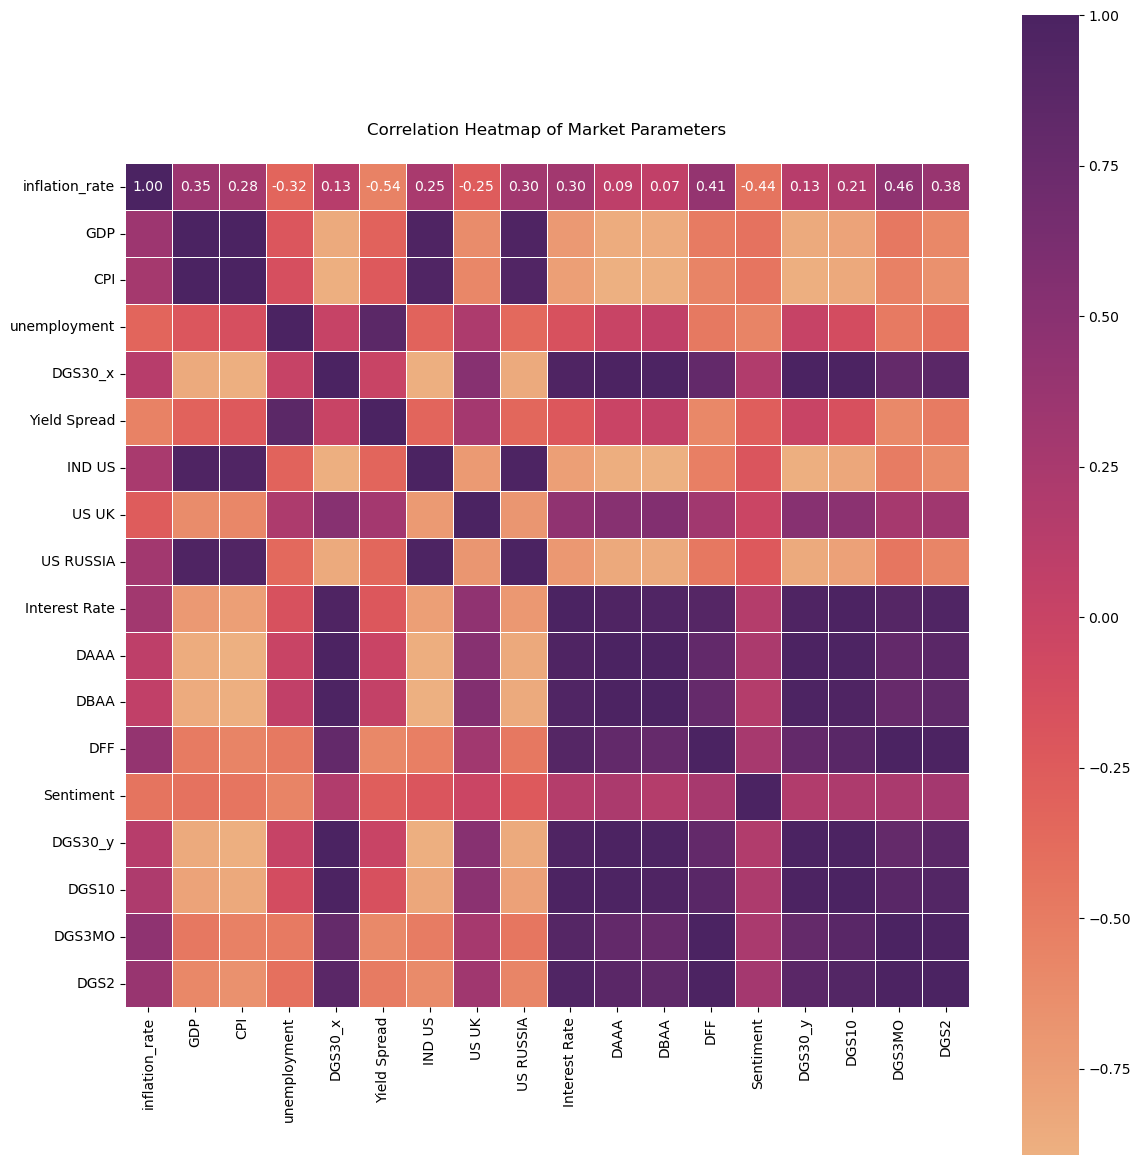

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("us_market_data_hourly_with_inflation_modified.csv")

# Select specific columns for correlation
selected_columns = [
    'inflation_rate', 'GDP',	'CPI','unemployment', 'DGS30_x','Yield Spread',	'IND US','US UK','US RUSSIA','Interest Rate','DAAA',	'DBAA',	'DFF','Sentiment',	'DGS30_y',	'DGS10',	'DGS3MO',	'DGS2'	
]

# Create correlation matrix
corr_matrix = df[selected_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='flare',
            fmt='.2f',
            square=True,
            linewidths=0.5,
            annot_kws={"size": 10})

plt.title('Correlation Heatmap of Market Parameters', pad=20)
plt.tight_layout()
plt.savefig('market_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()